#  Final Report For Capstone Project on Predicting the Severity of accidents for seattle city

## IBM Applied Data Science - Capstone Project

### Abstract

The purpose of this exploratory data analysis is to assess the possibility and accuracy to predict car accident severity in Seattle, USA by means of supervised machine learning models, exploiting collision track records from past accidents that were recorded by the Seattle Police Department (SPD) and provided as open data by Traffic Records.

Being able to predict car accident severity from extrenal factors like weather, location, road conditions as well as speeding, influence of alcohol/drugs etc. will allow the government to put appropriate meassures in place to reduce accident severity, but above all, allow the police and first response teams to channel their resources and increase efficiency.

Using car accident track records from March 2013, three different machine-learning methods, namely K-Nearest Neighbours (KNN), Decision Trees, and Logistic Regressors, were benchmarked against each other

While the exploratory data analysis suggests, that almost 90% of all accidents, involving pedestrians and 88% of collisions involving cyclists lead to injuries (compare: 28% of accidents without pedestrians/cyclists lead to injuries), the tested machine learning models generally had problems to correctly predict SEVERITYCLASS=2 and therefore exhibited a high number of false negatives for this class which can in real life lead to a wrong allocation of resources of police and first responders and potentially end deadly.

## Table Of Contents

1. Introduction 
2. Data Overview
 - Libraries
 - Data Loading
3. Methodology 
4. Code
 - Data Overview
 - Data Cleanup
 - Exploratory Data Analysis
 - Model Building
    - Data Preprocessing
    - Data Resampling
    - Data Normalization
    - Train,Test Splitting of Data
    - Classification Models
      - Logistic Regression 
      - SVM 
      - Decision Tree
      - KNN
   - Model Evaluation 
5. Result 
6. Conclusion 
 
  

## 1) Introduction

Despite the fact that the US population has increased threefold since the beginning of the 20th century and the total number of cars cracking the 280 million mark in 2019 (source), leading to a whopping 3000 billion miles travelled p.a., fatality rates in traffice continously decline. This decrease of deaths in car accidents is related to measures, enforced by the law (e.g. seat belt law, 1968), advanced safety features (mandatory air bags (1998)), but also improved road safety (e.g. signs, traffic lights etc.).

Moreover, thanks to technical advances in computer technology in the last decades, efficient measures can be taken even after an accident happened, e.g. by minimizing the response time of emergency teams and police through the smart analysis of accident records.

This coding exercise demonstrates how collision records can be analysed and provide insight into predicting car accident severity using the example of Seattle, USA.

## 2) Data Overview

The Data which is used for development of the model is the Collisions data that is provided by the Seattle department of transportation and Seattle police department and recorded in the traffic records. The data consists of all the Accidents taking place from year 2004 to Current year and is updated weekly. The data includes information about various attributes including weather conditions, road conditions, visibility, Accident severity. Since data is updated continuously the model can be trained and tested for continuous improvement and increasing the accuracy. For example:- In case of condtions such as when visiblity is poor or the road condition is not good the model will give a warning to the travellers.

### 2.1) Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
from sklearn import preprocessing 
import seaborn as sns
%matplotlib inline
print("The libraries are loaded")

The libraries are loaded


In [2]:
import folium

### 2.2) Data Loading 

In [3]:
accident_df=pd.read_csv("D:\Dataset\Data-Collisions.csv")
accident_df.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


## 3) Methodology 

The workflow for the data analysis is as follows: -
1. Data Loading
 - Involves downloading the data from the repository and storing it as a dataframe using pandas 
2. Data Overview 
 - Exploring the data in terms of dimensions, format, type of data and volume 
3. Data Cleanup
 - Cleaning up the data of non value adding information and making it fit for the model development 
4. Exploratory Data Analysis
 - Getting Insights from the data about frequency, distribution and pre-selection of features for Model Building
5. Model Building
 - Normalizing the data 
 - Benchmarking Differnet Models 

## 4) Code

### 4.1) Data Overview

In [4]:
print("Dimensions of dataset:",accident_df.shape)
accident_df.info()

Dimensions of dataset: (194673, 38)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     1946

In [5]:
## Frequency Distribution of the predicted variable/Dependent Variable: SeverityCode
print("The Frequency Distribution of Severity of Accidents:")
accident_df["SEVERITYCODE"].value_counts().to_frame()

The Frequency Distribution of Severity of Accidents:


,SEVERITYCODE
1,136485
2,58188


### Checking the Data for Missing Values/Null Values

In [6]:
accident_df.isnull().sum().to_frame()

,0
SEVERITYCODE,0
X,5334
Y,5334
OBJECTID,0
INCKEY,0
COLDETKEY,0
REPORTNO,0
STATUS,0
ADDRTYPE,1926
INTKEY,129603


### 4.2) Data Cleanup

In [7]:
accident_df["ACCIDENT_MONTH"]=pd.DatetimeIndex(accident_df["INCDATE"]).month #extractring month from INCDATE column

In [8]:
list=["OBJECTID","INCKEY","COLDETKEY","REPORTNO","STATUS","INCDATE","INTKEY","LOCATION","EXCEPTRSNCODE","SDOT_COLDESC","EXCEPTRSNDESC","SEVERITYCODE.1","SEVERITYDESC","COLLISIONTYPE","PERSONCOUNT","INCDTTM","JUNCTIONTYPE","SDOT_COLCODE","PEDROWNOTGRNT","SDOTCOLNUM","ST_COLCODE","ST_COLDESC","SEGLANEKEY","CROSSWALKKEY","HITPARKEDCAR"]
accident_df.drop(list,axis=1,inplace=True) #Dropping Uneccessary Columns
accident_df.head()


,SEVERITYCODE,X,Y,ADDRTYPE,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ACCIDENT_MONTH
0,2,-122.323148,47.703140,Intersection,0,0,2,NaN,N,Overcast,Wet,Daylight,NaN,3
1,1,-122.347294,47.647172,Block,0,0,2,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,12
2,1,-122.334540,47.607871,Block,0,0,3,NaN,0,Overcast,Dry,Daylight,NaN,11
3,1,-122.334803,47.604803,Block,0,0,3,NaN,N,Clear,Dry,Daylight,NaN,3
4,2,-122.306426,47.545739,Intersection,0,0,2,NaN,0,Raining,Wet,Daylight,NaN,1


In [9]:
accident_df["UNDERINFL"]=accident_df["UNDERINFL"].replace("N","0")
accident_df["UNDERINFL"]=accident_df["UNDERINFL"].replace("Y","1")
accident_df["INATTENTIONIND"]=accident_df["INATTENTIONIND"].fillna(0)
accident_df["INATTENTIONIND"]=accident_df["INATTENTIONIND"].replace("Y","1")
accident_df["SPEEDING"]=accident_df["SPEEDING"].fillna(0)
accident_df["SPEEDING"]=accident_df["SPEEDING"].replace("Y","1")
accident_df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ACCIDENT_MONTH
0,2,-122.323148,47.703140,Intersection,0,0,2,0,0,Overcast,Wet,Daylight,0,3
1,1,-122.347294,47.647172,Block,0,0,2,0,0,Raining,Wet,Dark - Street Lights On,0,12
2,1,-122.334540,47.607871,Block,0,0,3,0,0,Overcast,Dry,Daylight,0,11
3,1,-122.334803,47.604803,Block,0,0,3,0,0,Clear,Dry,Daylight,0,3
4,2,-122.306426,47.545739,Intersection,0,0,2,0,0,Raining,Wet,Daylight,0,1


In [10]:
#Since most of the dependent variables are of categorical type it is better to drop that data rather than replacing it 
accident_df["X"].dropna(axis=0,inplace=True)
accident_df["SEVERITYCODE"].dropna(axis=0,inplace=True)
accident_df["Y"].dropna(axis=0,inplace=True)
accident_df["ADDRTYPE"].dropna(axis=0,inplace=True)
accident_df["VEHCOUNT"].dropna(axis=0,inplace=True)
accident_df["WEATHER"].dropna(axis=0,inplace=True)
accident_df["ROADCOND"].dropna(axis=0,inplace=True)
accident_df["LIGHTCOND"].dropna(axis=0,inplace=True)
accident_df["ACCIDENT_MONTH"].dropna(axis=0,inplace=True)
accident_df["UNDERINFL"].dropna(axis=0,inplace=True)

In [11]:
print("The Number of NAN values in Severity code is:", accident_df["SEVERITYCODE"].isnull().sum())
print("The Number of NAN values in X is:", accident_df["X"].isnull().sum())
print("The Number of NAN values in Y is:",accident_df["Y"].isnull().sum())
print("The Number of NAN values in ADDRTYPE is:",accident_df["ADDRTYPE"].isnull().sum())
print("The Number of NAN values in VEHCOUNT is:",accident_df["VEHCOUNT"].isnull().sum())
print("The Number of NAN values in WEATHER is:",accident_df["WEATHER"].isnull().sum())
print("The Number of NAN values in ROADCOND is:",accident_df["ROADCOND"].isnull().sum())
print("The Number of NAN values in LIGHTCOND is:",accident_df["LIGHTCOND"].isnull().sum())
print("The Number of NAN values in ACCIDENT_MONTH is:",accident_df["ACCIDENT_MONTH"].isnull().sum())

The Number of NAN values in Severity code is: 0
The Number of NAN values in X is: 0
The Number of NAN values in Y is: 0
The Number of NAN values in ADDRTYPE is: 0
The Number of NAN values in VEHCOUNT is: 0
The Number of NAN values in WEATHER is: 0
The Number of NAN values in ROADCOND is: 0
The Number of NAN values in LIGHTCOND is: 0
The Number of NAN values in ACCIDENT_MONTH is: 0


### 4.3) Exploratory Data Analysis

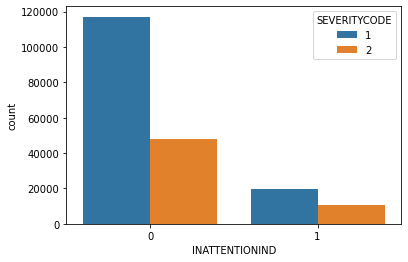

In [12]:
df=accident_df[["INATTENTIONIND","SEVERITYCODE"]]
sns.countplot(x="INATTENTIONIND",hue="SEVERITYCODE",data=df)

The Total count of accidents with Injury(severity 2) due to inattention are 10397 and percentage is 34.88%


The Total count of accidents with Injury(severity 2) when people were attentive are 47791 and percentage is 28.98%

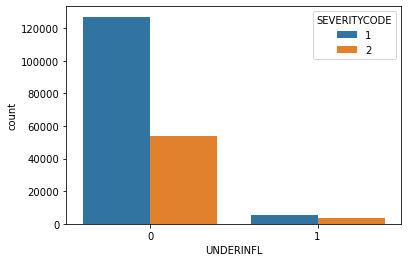

In [13]:
sns.countplot(x="UNDERINFL",hue="SEVERITYCODE",data=accident_df)

The Total count of accidents with Injuries(Severity=2) under the influence are 3562 and percentage is 39.06%

The Total count of accidents with Injuries(Severity=2) not under influence are 53597 and percentage is 29.67%

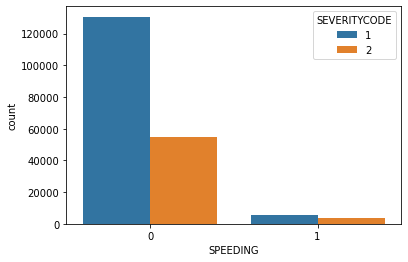

In [14]:
sns.countplot(x="SPEEDING",hue="SEVERITYCODE",data=accident_df)

The Total count of accidents with Injuries(Severity=2) when speeding was involved are 3531 and percentage is 37.83%

The Total count of accidents with Injuries(Severity=2) when speeding was not involved are 54657 and percentage is 29.5% 

#### Since INATTENTION, DRIVING UNDER INFLUENCES and SPEEDING are criminal offences we can say that on Analysis of CRIMINAL OFFENCES v/s SEVERITY CODE it is found that criminal offences increases the chances of accidents resulting in injuries(Severity Code=2) by approximately 8-9%

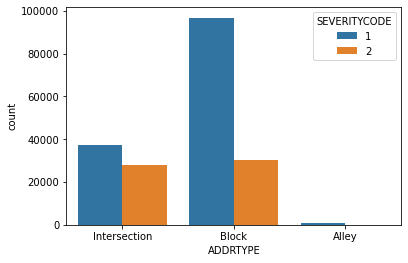

In [15]:
sns.countplot(x="ADDRTYPE",hue="SEVERITYCODE",data=accident_df)

### Addrtype: -
#### Intersection-
The total count of accident with injuries(Severity=2) are 27819 and percentage is 42.75%
#### Block-
The total count of accident with injuries(Severity=2) are 30096 and percentage is 23.71%
#### Alley-
The total count of accident with injuries(Severity=2) are 82 and percentage is 10.91%

#### On Analysis of data feature ADDRTYPE, describing the location of accidents shows that majority of accidents that result in injury(SEVERITYCODE=2) are intersection related as compared to any other location.

In [16]:
accident_df["WEATHER_1"]=accident_df["WEATHER"]
accident_df["WEATHER_1"].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER_1, dtype: int64

In [17]:
accident_df["WEATHER_1"]=accident_df["WEATHER_1"].replace("Clear","1")
accident_df["WEATHER_1"]=accident_df["WEATHER_1"].replace("Raining","2")
accident_df["WEATHER_1"]=accident_df["WEATHER_1"].replace("Overcast","3")
accident_df["WEATHER_1"]=accident_df["WEATHER_1"].replace("Snowing","4")
accident_df["WEATHER_1"]=accident_df["WEATHER_1"].replace("Other","5")
accident_df["WEATHER_1"]=accident_df["WEATHER_1"].replace("Fog/Smog/Smoke","6")
accident_df["WEATHER_1"]=accident_df["WEATHER_1"].replace("Sleet/Hail/Freezing Rain","7")
accident_df["WEATHER_1"]=accident_df["WEATHER_1"].replace("Blowing Sand/Dirt","8")
accident_df["WEATHER_1"]=accident_df["WEATHER_1"].replace("Severe Crosswind","9")
accident_df["WEATHER_1"]=accident_df["WEATHER_1"].replace("Partly Cloudy","10")
accident_df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ACCIDENT_MONTH,WEATHER_1
0,2,-122.323148,47.703140,Intersection,0,0,2,0,0,Overcast,Wet,Daylight,0,3,3
1,1,-122.347294,47.647172,Block,0,0,2,0,0,Raining,Wet,Dark - Street Lights On,0,12,2
2,1,-122.334540,47.607871,Block,0,0,3,0,0,Overcast,Dry,Daylight,0,11,3
3,1,-122.334803,47.604803,Block,0,0,3,0,0,Clear,Dry,Daylight,0,3,1
4,2,-122.306426,47.545739,Intersection,0,0,2,0,0,Raining,Wet,Daylight,0,1,2


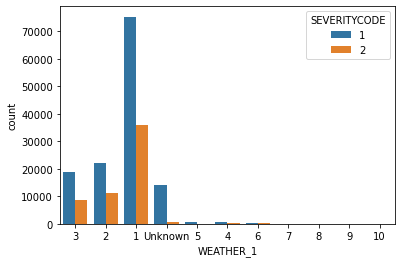

In [18]:
sns.countplot(x="WEATHER_1",hue="SEVERITYCODE",data=accident_df)

### Weather-
The total count of accident with injuries(Severity=2) when weather was clear(value=1)are 35840 and percentage is 32.25%

The total count of accident with injuries(Severity=2) when weather was rainy(value=2)are 11176 and percentage is 33.72%

The total count of accident with injuries(Severity=2) when weather was overcast(value=3)are 8745 and percentage is 31.55%

The total count of accident with injuries(Severity=2) when weather was snowing(value=4)are 171 and percentage is 18.85%

The total count of accident with injuries(Severity=2) when weather was fog/smog/smoke(value=6) are 187 and percentage is 32.86%

The total count of accident with injuries(Severity=2) when weather was sleet/hail/freezing rain(value=7) are 28 and percentage is 24.78%

The total count of accident with injuries(Severity=2) when weather was blowing sand/dirt(value=8) are 15 and percentage is 21.12%

The total count of accident with injuries(Severity=2) when weather was severe crosswind(value=9) are 7 and percentage is 28%

The total count of accident with injuries(Severity=2) when weather was partly cloudy(value=10) are 3 and percentage is 60%

The total count of accident with injuries(Severity=2) when weather was other than above conditions(value=5) are 116 and percentage is 13.94%

#### Maximum accidents that result in injury takes place mostly in partly cloudy weather condition that is around 60% but this result cannot be considered statistically stable as only 5 counts of such accidents are recorded. The other weather conditions that have high rate of injury related to accidents are rainy(33.72%), fog/smog/smoke(32.86%), overcast(31.55%) and clear(32.25%). It seems logical that due to lower visiblity conditions and wet roads the chances of accident leading to injuries increases.

#### With Clear being the one proving to give a counter intutive idea at first glance it can be explained further in the report. 

In [19]:
accident_df["ROADCOND"].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [20]:
accident_df["ROADCOND_1"]=accident_df["ROADCOND"]
accident_df["ROADCOND_1"]=accident_df["ROADCOND_1"].replace("Dry","1")
accident_df["ROADCOND_1"]=accident_df["ROADCOND_1"].replace("Wet","2")
accident_df["ROADCOND_1"]=accident_df["ROADCOND_1"].replace("Ice","3")
accident_df["ROADCOND_1"]=accident_df["ROADCOND_1"].replace("Snow/Slush","4")
accident_df["ROADCOND_1"]=accident_df["ROADCOND_1"].replace("Other","5")
accident_df["ROADCOND_1"]=accident_df["ROADCOND_1"].replace("Standing Water","6")
accident_df["ROADCOND_1"]=accident_df["ROADCOND_1"].replace("Sand/Mud/Dirt","7")
accident_df["ROADCOND_1"]=accident_df["ROADCOND_1"].replace("Oil","8")


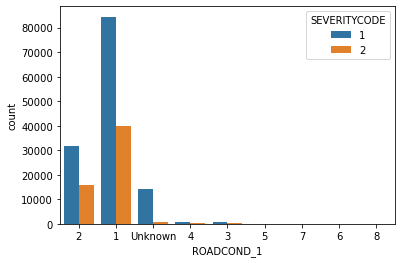

In [21]:
sns.countplot(x="ROADCOND_1",hue="SEVERITYCODE",data=accident_df)

### Road Condtion-
The total count of accident with injuries(Severity=2) when roads were dry(value=1)are 40064 and percentage is 32.18%

The total count of accident with injuries(Severity=2) when roads were wet(value=2)are 15755 and percentage is 33.19%

The total count of accident with injuries(Severity=2) when roads had ice(value=3)are 273 and percentage is 22.58%

The total count of accident with injuries(Severity=2) when roads had snow/slush(value=4)are 167 and percentage is 16.63%

The total count of accident with injuries(Severity=2) when roads had standing water(value=6)are 30 and percentage is 26.09%

The total count of accident with injuries(Severity=2) when roads had sand/mud/dirt(value=7)are 23 and percentage is 30.67%

The total count of accident with injuries(Severity=2) when roads had oil(value=8)are 24 and percentage is 37.5%

The total count of accident with injuries(Severity=2) when roads had condition any other than above(value=5)are 43 and percentage is 32.58%

#### Oily Roads have one of the highest risk causing accidents that lead to injuries at 37.5% but with only 24 counts of such actual accidents being recorded shows that this statement is not stable statistically. The other conditions that impose a high risk are wet and dry which can be directly correlated with weather conditions. 

In [22]:
accident_df["LIGHTCOND"].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

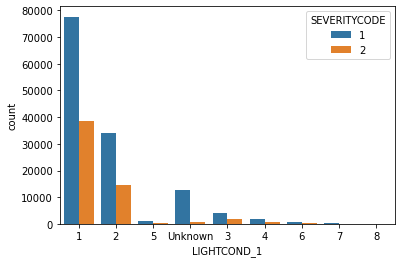

In [23]:
accident_df["LIGHTCOND_1"]=accident_df["LIGHTCOND"]
accident_df["LIGHTCOND_1"]=accident_df["LIGHTCOND_1"].replace("Daylight","1")
accident_df["LIGHTCOND_1"]=accident_df["LIGHTCOND_1"].replace("Dark - Street Lights On","2")
accident_df["LIGHTCOND_1"]=accident_df["LIGHTCOND_1"].replace("Dusk","3")
accident_df["LIGHTCOND_1"]=accident_df["LIGHTCOND_1"].replace("Dawn","4")
accident_df["LIGHTCOND_1"]=accident_df["LIGHTCOND_1"].replace("Dark - No Street Lights","5")
accident_df["LIGHTCOND_1"]=accident_df["LIGHTCOND_1"].replace("Dark - Street Lights Off","6")
accident_df["LIGHTCOND_1"]=accident_df["LIGHTCOND_1"].replace("Other","7")
accident_df["LIGHTCOND_1"]=accident_df["LIGHTCOND_1"].replace("Dark - Unknown Lighting","8")
sns.countplot(x="LIGHTCOND_1",hue="SEVERITYCODE",data=accident_df)

### Light Condition-
The total count of accident with injuries(Severity=2) during daylight(value=1)are 38544 and percentage is 33.19%

The total count of accident with injuries(Severity=2) during night in areas where streetlights were on (value=2)are 14475 and percentage is 29.84%

The total count of accident with injuries(Severity=2) during dusk(value=3)are 1944 and percentage is 32.94%

The total count of accident with injuries(Severity=2) during dawn(value=4)are 824 and percentage is 32.94%

The total count of accident with injuries(Severity=2) during night in areas where there are no street lights(value=5)are 334 and percentage is 21.73%

The total count of accident with injuries(Severity=2) during night in areas where street lights were off(value=6)are 316 and percentage is 26.36%

The total count of accident with injuries(Severity=2) during night in an unknown light source(value=8)are 4 and percentage is 36.36%

The total count of accident with injuries(Severity=2) when light conditions were other than above(value=7)are 52 and percentage is 22.13%

#### On anlysing the data feature of LIGHT CONDITION it can be said that almost majority of injury related accidents take place at time of day, dawn and dusk with 33.19%, 32.94% and 32.94% respectively.  

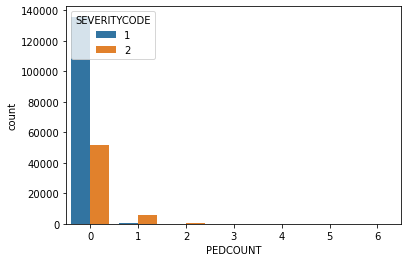

In [24]:
sns.countplot(x="PEDCOUNT",hue="SEVERITYCODE",data=accident_df)

The total count of accident with injuries(Severity=2) when one or more than one pedestrians were involved are 6241 and percentage is 89.94%

The total count of accident with injuries(Severity=2) when no pedestrians were involved are 51947 and percentage is 27.62%

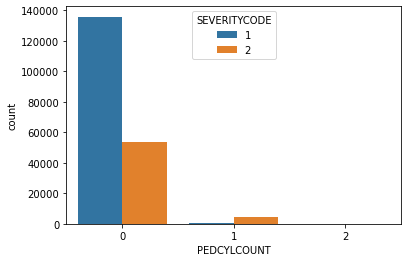

In [25]:
sns.countplot(x="PEDCYLCOUNT",hue="SEVERITYCODE",data=accident_df)

The total count of accident with injuries(Severity=2) when one or more than one cycle users were involved are 4805 and percentage is 87.62%

The total count of accident with injuries(Severity=2) when no cycle users were involved are 53383 and percentage is 28.22%

#### The involvement of pedestrians and cycle users increase the risk of accidents leading to injury(SEVERITY CODE=2) by approximately 88%. This can also explain the high rate of accidents with injuries during the clear weather, with dry roads as during such weather conditions the number of people coming out of their house increases 

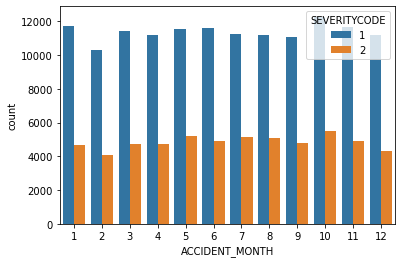

In [26]:
sns.countplot(x="ACCIDENT_MONTH",hue="SEVERITYCODE",data=accident_df)

#### The graph shows that on an average the same amount of traffic accidents take place each month 

### 4.4) Model Building

#### 4.4.1) Data Preprocessing

In [27]:
feature=accident_df[["ACCIDENT_MONTH","LIGHTCOND_1","ROADCOND_1","WEATHER_1","X","Y","VEHCOUNT","INATTENTIONIND","UNDERINFL","SPEEDING"]]
accident_df.drop(feature,axis=1,inplace=True)
accident_df.head()

,SEVERITYCODE,ADDRTYPE,PEDCOUNT,PEDCYLCOUNT,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,0,0,Overcast,Wet,Daylight
1,1,Block,0,0,Raining,Wet,Dark - Street Lights On
2,1,Block,0,0,Overcast,Dry,Daylight
3,1,Block,0,0,Clear,Dry,Daylight
4,2,Intersection,0,0,Raining,Wet,Daylight


In [28]:
#Converting Categorical Variables into Numerical Variables to be used for Model
dummy_variable_1=pd.get_dummies(accident_df["ADDRTYPE"])
dummy_variable_1.rename(columns={'ADDRTYPE':'ALLEY','ADDRTYPE':'BLOCK','ADDRTYPE':'INTERSECTION'})
accident_df=pd.concat([accident_df,dummy_variable_1],axis=1)
accident_df.drop("ADDRTYPE",axis=1,inplace=True)
accident_df.head()

,SEVERITYCODE,PEDCOUNT,PEDCYLCOUNT,WEATHER,ROADCOND,LIGHTCOND,Alley,Block,Intersection
0,2,0,0,Overcast,Wet,Daylight,0,0,1
1,1,0,0,Raining,Wet,Dark - Street Lights On,0,1,0
2,1,0,0,Overcast,Dry,Daylight,0,1,0
3,1,0,0,Clear,Dry,Daylight,0,1,0
4,2,0,0,Raining,Wet,Daylight,0,0,1


In [29]:
dummy_variable_2=pd.get_dummies(accident_df["WEATHER"])
dummy_variable_2.drop("Unknown",axis=1,inplace=True)
dummy_variable_2.rename(columns={"Other":"Other_W"},inplace=True)
accident_df=pd.concat([accident_df,dummy_variable_2],axis=1)
accident_df.drop("WEATHER",axis=1,inplace=True)
accident_df.head()

,SEVERITYCODE,PEDCOUNT,PEDCYLCOUNT,ROADCOND,LIGHTCOND,Alley,Block,Intersection,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other_W,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing
0,2,0,0,Wet,Daylight,0,0,1,0,0,0,0,1,0,0,0,0,0
1,1,0,0,Wet,Dark - Street Lights On,0,1,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,Dry,Daylight,0,1,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,Dry,Daylight,0,1,0,0,1,0,0,0,0,0,0,0,0
4,2,0,0,Wet,Daylight,0,0,1,0,0,0,0,0,0,1,0,0,0


In [30]:
dummy_variable_3=pd.get_dummies(accident_df["ROADCOND"])
dummy_variable_3.drop("Unknown",axis=1,inplace=True)
dummy_variable_3.rename(columns={"Other":"Other_R"},inplace=True)
accident_df=pd.concat([accident_df,dummy_variable_3],axis=1)
accident_df.drop("ROADCOND",axis=1,inplace=True)
accident_df.head()

,SEVERITYCODE,PEDCOUNT,PEDCYLCOUNT,LIGHTCOND,Alley,Block,Intersection,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,...,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Other_R,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet
0,2,0,0,Daylight,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,Dark - Street Lights On,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,Daylight,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,Daylight,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2,0,0,Daylight,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
dummy_variable_4=pd.get_dummies(accident_df["LIGHTCOND"])
dummy_variable_4.drop("Unknown",axis=1,inplace=True)
dummy_variable_4.rename(columns={"Other":"Other_L"},inplace=True)
accident_df=pd.concat([accident_df,dummy_variable_4],axis=1)
accident_df.drop("LIGHTCOND",axis=1,inplace=True)
accident_df.head()

,SEVERITYCODE,PEDCOUNT,PEDCYLCOUNT,Alley,Block,Intersection,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other_W,...,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other_L
0,2,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [32]:
accident_df.shape

(194673, 32)

#### 4.4.2) Data Resampling

In [33]:
accident_df["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [34]:
#resampling data to remove thew classification bias from the model 
from sklearn.utils import resample
#splitting data into different datasets as per the severity code
accident_df_severitycode1=accident_df[accident_df.SEVERITYCODE==1]
accident_df_severitycode2=accident_df[accident_df.SEVERITYCODE==2]
#downsampling accidents with severity code 1
accident_df_severitycode1_resampled=resample(accident_df_severitycode1,replace=False,n_samples=58188,random_state=123)
accident_df_resampled=pd.concat([accident_df_severitycode1_resampled,accident_df_severitycode2])
accident_df_resampled["SEVERITYCODE"].value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [35]:
print(accident_df_resampled.isnull().sum()) #Checking for null values one last time before scalingthe data 

SEVERITYCODE                0
PEDCOUNT                    0
PEDCYLCOUNT                 0
Alley                       0
Block                       0
Intersection                0
Blowing Sand/Dirt           0
Clear                       0
Fog/Smog/Smoke              0
Other_W                     0
Overcast                    0
Partly Cloudy               0
Raining                     0
Severe Crosswind            0
Sleet/Hail/Freezing Rain    0
Snowing                     0
Dry                         0
Ice                         0
Oil                         0
Other_R                     0
Sand/Mud/Dirt               0
Snow/Slush                  0
Standing Water              0
Wet                         0
Dark - No Street Lights     0
Dark - Street Lights Off    0
Dark - Street Lights On     0
Dark - Unknown Lighting     0
Dawn                        0
Daylight                    0
Dusk                        0
Other_L                     0
dtype: int64


#### 4.4.3) Data Normalization 

In [36]:
from sklearn import preprocessing
feature=accident_df[["PEDCOUNT","PEDCYLCOUNT","Alley","Block","Intersection","Blowing Sand/Dirt","Clear","Fog/Smog/Smoke","Other_W","Overcast","Partly Cloudy","Raining","Severe Crosswind","Sleet/Hail/Freezing Rain","Snowing","Dry","Ice","Oil","Other_R","Sand/Mud/Dirt","Snow/Slush","Standing Water","Wet","Dark - No Street Lights","Dark - Street Lights Off","Dark - Street Lights On","Dark - Unknown Lighting","Dawn","Daylight","Dusk","Other_L"]]
x=preprocessing.StandardScaler().fit(feature).transform(feature)
y=accident_df["SEVERITYCODE"]


In [37]:
feature_1=accident_df_resampled[["PEDCOUNT","PEDCYLCOUNT","Alley","Block","Intersection","Blowing Sand/Dirt","Clear","Fog/Smog/Smoke","Other_W","Overcast","Partly Cloudy","Raining","Severe Crosswind","Sleet/Hail/Freezing Rain","Snowing","Dry","Ice","Oil","Other_R","Sand/Mud/Dirt","Snow/Slush","Standing Water","Wet","Dark - No Street Lights","Dark - Street Lights Off","Dark - Street Lights On","Dark - Unknown Lighting","Dawn","Daylight","Dusk","Other_L"]]
x_1=preprocessing.StandardScaler().fit(feature_1).transform(feature_1)
y_1=accident_df_resampled["SEVERITYCODE"]

#### 4.4.4) Splitting Dataset into Training and Testing Subsets

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
print("The training set is:",x_train.shape,y_train.shape)
print("The test set is:",x_test.shape,y_test.shape)

The training set is: (155738, 31) (155738,)
The test set is: (38935, 31) (38935,)


In [39]:
xtrain,xtest,ytrain,ytest=train_test_split(x_1,y_1,test_size=0.2,random_state=4)
print("The training set is:",xtrain.shape,ytrain.shape)
print("The test set is:",xtest.shape,ytest.shape)

The training set is: (93100, 31) (93100,)
The test set is: (23276, 31) (23276,)


Now that we have a clean, balanced and standardised dataset for the city of Seattle. We have converted the categorical variables into numerical variables through the use of standard preprocessing techniques. We are ready to build and test models for predicting the Severity Code from our choosen feature set. 

#### 4.4.5) Classification Models

Since the dependent variable is a binary we are going to apply classifcation machine learning techniques to build the model. The followignare the techniques we are going to use: -
1) K-Nearest Neighbors

2) Logistic Regression 

3) Support Vector Machine(SVM) 

4) Decision Tree Classification 

#### 4.4.5.1) Logistic Regression

#### Model without resampling

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [41]:
LR=LogisticRegression(C=0.01,solver="liblinear").fit(x_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [42]:
y_hat_LR=LR.predict(x_test)
y_hat_prob=LR.predict_proba(x_test)
print("The accuracy of Logistic Regression is:", metrics.accuracy_score(y_test,y_hat_LR))

The accuracy of Logistic Regression is: 0.7532040580454604


#### 4.4.5.2) Model with resampling

In [43]:
LR_resampled=LogisticRegression(C=0.01,solver="liblinear").fit(xtrain,ytrain)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [44]:
y_hat1_LR=LR.predict(xtest)
y_hat1_prob=LR.predict_proba(xtest)
print("The accuracy of Logistic Regression is:", metrics.accuracy_score(ytest,y_hat1_LR))

The accuracy of Logistic Regression is: 0.5897490977831242


#### 4.4.5.3) Support Vector Machine(SVM)

#### Model without resampling

In [45]:
from sklearn import svm


In [46]:
severity=svm.SVC(kernel="rbf")
severity.fit(x_train,y_train)

SVC()

In [47]:
y_hat_svm=severity.predict(x_test)
y_hat_svm[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [48]:
print("The accuracy of SVM is:", metrics.accuracy_score(y_test,y_hat_svm))

The accuracy of SVM is: 0.7528701682290998


#### Model with resampling

In [49]:
severity_1=svm.SVC(kernel="rbf")
severity_1.fit(xtrain,ytrain)

SVC()

In [50]:
y_hat1_svm=severity_1.predict(xtest)
y_hat1_svm[0:5]

array([2, 1, 1, 1, 1], dtype=int64)

In [51]:
print("The accuracy of SVM is:", metrics.accuracy_score(ytest,y_hat1_svm))

The accuracy of SVM is: 0.6397147276164289


#### 4.4.5.4) Decision Tree

#### Model without resampling

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
severitytree=DecisionTreeClassifier(criterion='entropy', max_depth=4)
severitytree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [54]:
predtree=severitytree.predict(x_test)
print("The accuracy of decision tree is:", metrics.accuracy_score(y_test,predtree))

The accuracy of decision tree is: 0.7532554257095159


#### Model with resampling

In [55]:
severitytree1=DecisionTreeClassifier(criterion='entropy', max_depth=4)
severitytree1.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [56]:
predtree1=severitytree1.predict(xtest)
print("The accuracy of decision tree is:", metrics.accuracy_score(ytest,predtree1))

The accuracy of decision tree is: 0.6361488228217906


#### 4.4.5.5) K-Nearest Neighbors

#### Model without resampling

In [57]:
from sklearn.neighbors import KNeighborsClassifier
neigh=KNeighborsClassifier(n_neighbors=4).fit(x_train,y_train)
y_hat=neigh.predict(x_test)
y_hat[0:5]

array([1, 1, 1, 2, 1], dtype=int64)

In [58]:
from sklearn import metrics
print("Train set accuracy:", metrics.accuracy_score(y_train,neigh.predict(x_train)))
print("Test set accuracy:", metrics.accuracy_score(y_test,y_hat))

Train set accuracy: 0.742779539996661
Test set accuracy: 0.745678695261333


In [59]:
ks=20
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
confusionmx=[];
for n in range(1,ks):
    neig=KNeighborsClassifier(n_neighbors=n).fit(x_train,y_train)
    y_hat=neigh.predict(x_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,y_hat)
    std_acc[n-1]=np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])
mean_acc



array([0.7456787, 0.7456787, 0.7456787, 0.7456787, 0.7456787, 0.7456787,
       0.7456787, 0.7456787, 0.7456787, 0.7456787, 0.7456787, 0.7456787,
       0.7456787, 0.7456787, 0.7456787, 0.7456787, 0.7456787, 0.7456787,
       0.7456787])

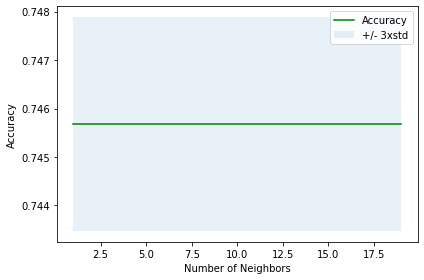

In [60]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1*std_acc,mean_acc + 1*std_acc,alpha=0.10)
plt.legend(('Accuracy','+/- 3xstd'))
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors")
plt.tight_layout()
plt.show()


#### Model with resampling

In [62]:
neigh_1=KNeighborsClassifier(n_neighbors=4).fit(xtrain,ytrain)
y_hat1=neigh.predict(xtest)
print("Train set accuracy:", metrics.accuracy_score(ytrain,neigh.predict(xtrain)))
print("Test set accuracy:", metrics.accuracy_score(ytest,y_hat1))

Train set accuracy: 0.584156820622986
Test set accuracy: 0.5849802371541502


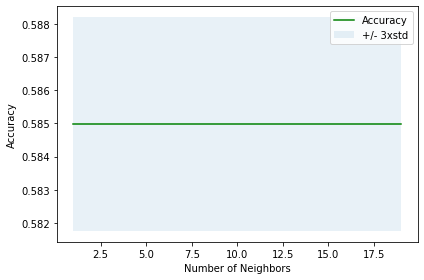

In [63]:
ks=20
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
confusionmx=[];
for n in range(1,ks):
    neig=KNeighborsClassifier(n_neighbors=n).fit(xtrain,ytrain)
    y_hat1=neigh.predict(xtest)
    mean_acc[n-1]=metrics.accuracy_score(ytest,y_hat1)
    std_acc[n-1]=np.std(y_hat1==ytest)/np.sqrt(y_hat1.shape[0])
mean_acc
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1*std_acc,mean_acc + 1*std_acc,alpha=0.10)
plt.legend(('Accuracy','+/- 3xstd'))
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors")
plt.tight_layout()
plt.show()

### 4.5) Model Evaluation

#### Model without resampling

In [74]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_score

##### Logistic Regression

In [75]:
print("The Jaccard Score is: %.4f" %jaccard_score(y_test,y_hat_LR))
print("The F-1 Score is: %.4f" %f1_score(y_test,y_hat_LR,average='weighted'))
print("The Log loss is: %.4f"%log_loss(y_test,y_hat_prob))

The Jaccard Score is: 0.7385
The F-1 Score is: 0.6909
The Log loss is: 0.5335


##### Support Vector Machine(SVM)

In [76]:
print("The Jaccard Score is: %.4f" %jaccard_score(y_test,y_hat_svm))
print("The F-1 Score is: %.4f" %f1_score(y_test,y_hat_svm,average='weighted'))

The Jaccard Score is: 0.7382
The F-1 Score is: 0.6904


##### Decision Tree

In [77]:
print("The Jaccard Score is: %.4f" %jaccard_score(y_test,predtree))
print("The F-1 Score is: %.4f" %f1_score(y_test,predtree,average='weighted'))

The Jaccard Score is: 0.7386
The F-1 Score is: 0.6910


##### K-Nearest Neighbors

In [78]:
print("The Jaccard Score is: %.4f" %jaccard_score(y_test,y_hat))
print("The F-1 Score is: %.4f" %f1_score(y_test,y_hat,average='weighted'))

The Jaccard Score is: 0.7290
The F-1 Score is: 0.6905


#### Model with resampling 

##### Logistic Regression

In [81]:
print("The Jaccard Score is: %.4f" %jaccard_score(ytest,y_hat1_LR))
print("The F-1 Score is: %.4f" %f1_score(ytest,y_hat1_LR,average='weighted'))
print("The Log loss is: %.4f"%log_loss(ytest,y_hat1_prob))

The Jaccard Score is: 0.5466
The F-1 Score is: 0.5115
The Log loss is: 0.7057


##### Support Vector Machine(SVM)

In [82]:
print("The Jaccard Score is: %.4f" %jaccard_score(ytest,y_hat1_svm))
print("The F-1 Score is: %.4f" %f1_score(ytest,y_hat1_svm,average='weighted'))

The Jaccard Score is: 0.5067
The F-1 Score is: 0.6360


##### Decision Tree

In [83]:
print("The Jaccard Score is: %.4f" %jaccard_score(ytest,predtree1))
print("The F-1 Score is: %.4f" %f1_score(ytest,predtree1,average='weighted'))

The Jaccard Score is: 0.4983
The F-1 Score is: 0.6333


##### K-Nearest Neighbors

In [84]:
print("The Jaccard Score is: %.4f" %jaccard_score(ytest,y_hat1))
print("The F-1 Score is: %.4f" %f1_score(ytest,y_hat1,average='weighted'))

The Jaccard Score is: 0.5276
The F-1 Score is: 0.5297


|                    |      Without Resampling      |        With  Resampling      |
|------------------- |------------------------------|------------------------------|
| Algorithm          | Jaccard | F1-score | LogLoss | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- | ------- | -------- | ------- |
| LogisticRegression | 0.7385  | 0.6909   | 0.5335  | 0.5466  | 0.5115   | 0.7057  |
| SVM                | 0.7382  | 0.6904   | NA      | 0.5067  | 0.6360   | NA      |
| Decision Tree      | 0.7386  | 0.6910   | NA      | 0.4983  | 0.6333   | NA      |
| KNN                | 0.7290  | 0.6905   | ?       | 0.5276  | 0.5297   | NA      |

### 5) Result

There were two models constructed respectively: - 
1) In which the data was not resampled 

2) In which data was resampled 

Both the models were then trained on the same clasification algorithms to make a fair comparision between the two. It was found that the models which were trained on the dataset that was not resampled had a higher accuracy for the predictions and lower uncertainity as compared to it's counterpart. Though the data without resampling might have a little bias due to a very high value of accidents having SEVERITYCODE 1 in respect to accidents having SEVERITYCODE 2. But due to resampling the accuracy and uncertainity increases and this means that some important information or trend goes missing. Thus, impacting the accuracy and predictive ability of the model.

For Logistic Regression Model the value of log loss for data without resampling is almost 32.27% higher showing a very high level if uncertainity. Similar trend is visible for jaccard score as well as F1 socres for all the other models. This model also gives a large value of false negatives for accidents of severity class 2 and fails to make accurate prediction for them.


### 6) Conclusion 

The aim of this project is to predict the severity of accidents and to reveal the factors affecting the severity. When examining the feature importance after the training step, it seems possible to say that there are several remarkable features. It seems quite effective that a pedestrian or cyclist was involved in the accident.

Going back to the exploratory data analysis step, we were able to get many important following insights such as majority of accidents that take place in wet conditions of road are directly related with the rainy and overcast weather while majority of the accidents that take place in dry conditions involve majority of pedestrians and cyclists. The accidents that result in majority of injuries take place at dawn,daytime and dusk.This proves the logical conditions of lower visibility will result in higher injury accidents to be untrue on majority. The intersection as a place has a large amount of accidents with injuries and property damage as the collision of vehicles take place at an angle. The criminal offences such as inattention, driving under influences and speeding increases the risk of ijury causing accidents and the timings of these offences explains the high accidents during dawn and dusk.

Various points that can make suggestions based on all insights can be listed as follows,

- Drivers should be more careful where pedestrians and/or cyclists are concentrated. (*is_ped* and *is_bike*)

- Drivers should be more careful at intersections. (*addr_type_intersection*)

- Age as a factor should be considered by seattle transportation department which will be very useful in explaining criminal offences.

- Extra measures can be taken to prevent driving under drugs and alcohol. (*under_infl*)


Apart from the features that distinguish the two classes from each other, suggestions for situations where accidents occur frequently can be listed as follows:

- At hours close to office hours drivers should be more careful.

- Special precautions can be taken by the relevant authorities, especially since there are angles type collisions at intersections.

- Authoritites should look at districts with schools, universities and offices where the pedestrians and cyclist are concentrated. 

- Authorities should also make rules, take precautions and make arrangements for the safety of pedestrains and cyclist. 